# Тема 11 - «Модель (B,S)-рынка Кокса-Росса-Рубинштейна (CRR-рынок). Вычисление цены опционов Европейского типа»


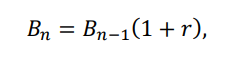

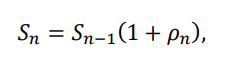

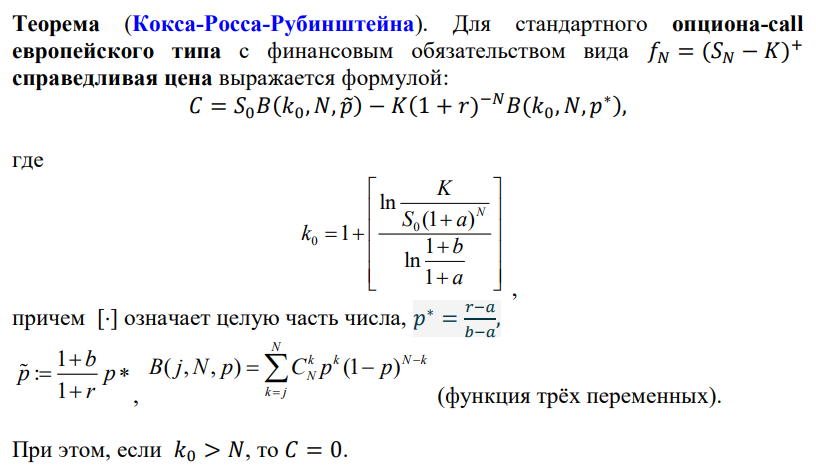

In [1]:
import numpy as np
import math

In [2]:
def binomial_func(j, N, p):
  return math.comb(N, int(j)) * pow(p, int(j)) * pow(1-p, N-int(j))

# Аудиторная работа

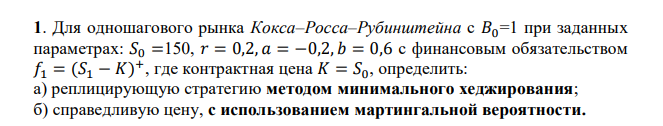

In [3]:
B0 = 1
S0 = 150
r = 0.2
a = -0.2
b = 0.6
K = S0
N = 1 # одношаговый рынок

In [5]:
S_up = S0 * (1 + b)
S_down = S0 * (1 + a)

f = S_up - S0   #f1 = (S1 - K)^(+)

p = (S0 * (1+r) - S_up) / (S_down - S_up)

A = np.array([[(1 + r), S_up], [(1 + r), S_down]])
B = np.array([f, 0]).reshape(-1, 1)

components = np.linalg.inv(A).dot(B).ravel() 
beta = components[0]
gamma = components[1]

C = f * (1-p) / (1 + r)  # т.к. S_up

print('а) реплицирующая стратегия: \nbeta = ', round(beta,3), '\ngamma= ', round(gamma,3)) 
print('\nб) справедливая цена:', round(C, 3))
print('мартингальная вероятность', round(p,3))

а) реплицирующая стратегия: 
beta =  -75.0 
gamma=  0.75

б) справедливая цена: 37.5
мартингальная вероятность 0.5


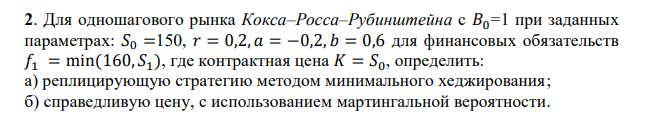

Мартингальная вероятность используется для расчета вероятности будущих цен и позволяет избежать арбитража на финансовых рынках. Формула справедливой цены с использованием мартингальной вероятности помогает определить объективную стоимость опциона, учитывая вероятности будущих изменений цены базового актива.

In [22]:
B0 = 1
S0 = 150
r = 0.2
a = -0.2
b = 0.6
K = S0
N = 1 # одношаговый рынок

#f1 = min(160, S1)

In [8]:
S_up = S0 * (1 + b)
S_down = S0 * (1 + a)
print(S_up, S_down)

240.0 120.0


In [26]:
S_up = S0 * (1 + b)
S_down = S0 * (1 + a)

f_down = min(160, S_down)
f_up = min(160, S_up)
print('f:', f_down, f_up)

p = (S0 * (1+r) - S_up) / (S_down - S_up)

A = np.array([[(1 + r), S_up], [(1 + r), S_down]])
B = np.array([f, 0]).reshape(-1, 1)

components = np.linalg.inv(A).dot(B).ravel() 
beta = components[0]
gamma = components[1]+1

C = (f_down * p + (1 - p) * f_up) / (1+r)

print('а) реплицирующая стратегия: \nbeta = ', round(beta,3), '\ngamma= ', round(gamma,3)) 
print('\nб) справедливая цена:', C)   
print('мартингальная вероятность', round(p, 3))

f: 120.0 160
а) реплицирующая стратегия: 
beta =  66.667 
gamma=  0.333

б) справедливая цена: 116.66666666666667
мартингальная вероятность 0.5


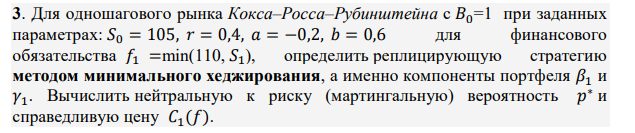

In [ ]:
N = 1
B0 = 1
S0 = 105
r = 0.4
a = -0.2
b = 0.6
K = S0

# f1 = min(110,S1)
# найти beta1, gamma1, p_star, C1(f)

In [30]:
S_up = S0 * (1+b)
S_down = S0 * (1+a)

f_up = min(110, S_up)
f_down = min(110, S_down)

A = np.array([[(1+r), S_up], [(1+r), S_down]])
B = np.array([f_up, f_down]).reshape(-1, 1)

componets = np.linalg.inv(A).dot(B).ravel() 
print('компоненты: ', componets)
beta_one = componets[0]
gamma_one = componets[1]
print('beta1 = ', round(beta_one,3), '\ngamma1 = ', round(gamma_one,3))

компоненты:  [9.16666667e+01 2.42861287e-17]
beta1 =  91.667 
gamma1 =  0.0


In [29]:
p = (S0 * (1+r) - S_up) / (S_down - S_up)
C = (p * f_up + (1 - p) * f_down) / (1+r)
print('мартингальная вероятность = ', round(q,3))
print('справедливая цена = ', round(C, 3))

мартингальная вероятность =  0.5
справедливая цена =  91.667


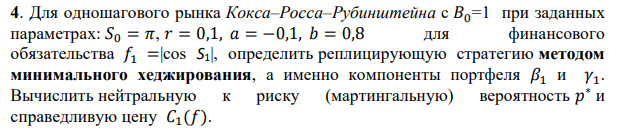

In [ ]:
N = 1
B0 = 1
S0 = np.pi
r = 0.1
a = -0.1
b = 0.8
K = S0

# f1 = |cos(S1)|
# найти beta1, gamma1, p_star, C1(f)

In [ ]:
S_up = S0 * (1+b)
S_down = S0 * (1+a)

profit_up = abs(np.cos(S_up))
profit_down = abs(np.cos(S_down))

A = np.array([[(1+r), S_up], [(1+r), S_down]])
B = np.array([profit_up, profit_down]).reshape(-1, 1)

componets = np.linalg.inv(A).dot(B).ravel() 
print('компоненты: ', componets)
beta_one = componets[0]
gamma_one = componets[1]
print('beta1 = ', round(beta_one,3), '\ngamma1 = ', round(gamma_one,3))

компоненты:  [ 0.99372367 -0.0502362 ]
beta1 =  0.994 
gamma1 =  -0.05


In [ ]:
p = (S0 * (1+r) - S_down) / (S_up - S_down)
C = (p * profit_down + (1 - p) * profit_up) / (1+r)
print('мартингальная вероятность = ', round(p,3))
print('справедливая цена = ', round(C, 3))

мартингальная вероятность =  0.222
справедливая цена =  0.764


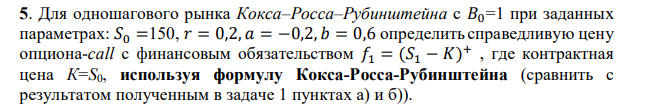

In [ ]:
B0 = 1
S0 = 150
r = 0.2
a = -0.2
b = 0.6
K = S0
N = 1

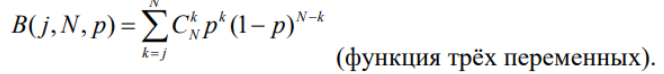

In [ ]:
p_star = (r-a) / (b-a)
p_wave = (1+b) / (1+r) * p_star

k0 = 1 + np.log(K / (S0 * (1 + a)**N)) / np.log((1+b) / (1+a))
print('p*:', p_star, 'p_wave = ', round(p_wave,3))

p*: 0.5 p_wave =  0.667


In [ ]:
C = S0 * binomial_func(k0, N, p_wave) - K * (1+r)**(-N) * binomial_func(k0, N, p_star)
print('Справедливая цена: ', round(C,3))

Справедливая цена:  37.5


Сравнение с результатом из задачи 1, где справедливая цена: 37.5 - цены совпадают при разных методах.

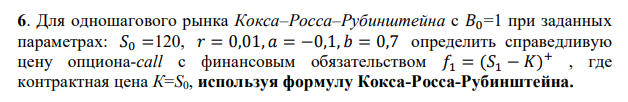

In [ ]:
B0 = 1
S0 = 120
r = 0.01
a = -0.1
b = 0.7
K = S0
N = 1

In [ ]:
p_star = (r-a) / (b-a)
p_wave = (1+b) / (1+r) * p_star

k0 = 1 + np.log(K / (S0 * (1 + a)**N)) / np.log((1+b) / (1+a))

C = S0 * binomial_func(k0, N, p_wave) - K * (1+r)**(-N) * binomial_func(k0, N, p_star)
print('Справедливая цена: ', round(C,3))

Справедливая цена:  11.436


# Домашняя работа

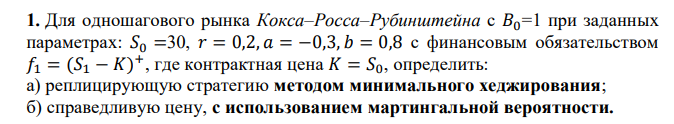

In [ ]:
B0 = 1
S0 = 30
r = 0.2
a = -0.3
b = 0.8
K = S0
N = 1 # одношаговый рынок

In [ ]:
S_up = S0 * (1 + b)
S_down = S0 * (1 + a)

f = S_up - S0   #f1 = (S1-K)^(+)
p = (S0 * (1+r) - S_up) / (S_down - S_up)

A = np.array([[(1 + r), S_up], [(1 + r), S_down]])
B = np.array([f, 0]).reshape(-1, 1)

components = np.linalg.inv(A).dot(B).ravel() 
beta = components[0]
gamma = components[1]

C = f * (1-p) / (1 + r)  # (1-p) т.к. S_up 


print('а) реплицирующая стратегия: \nbeta = ', round(beta,3), '\ngamma= ', round(gamma,3)) 
print('\nб) справедливая цена:', round(C, 3))
print('мартингальная вероятность', round(q,3))

а) реплицирующая стратегия: 
beta =  -12.727 
gamma=  0.727

б) справедливая цена: 9.091
мартингальная вероятность 0.685


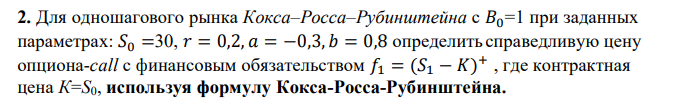

In [ ]:
B0 = 1
S0 = 30
r = 0.2
a = -0.3
b = 0.8
K = S0
N = 1

In [ ]:
def binomial(j, N, p):
  return p**(j)*(1-p)**(N-j)  

  
p_star = (r-a) / (b-a)
p_wave = (1+b) / (1+r) * p_star

k0 = 1 + np.log(K / (S0 * (1 + a)**N)) / np.log((1+b) / (1+a))

C = S0 * binomial(k0, N, p_wave) - K * (1+r)**(-N) * binomial(k0, N, p_star)
print('Справедливая цена: ', round(C,3))

Справедливая цена:  16.669


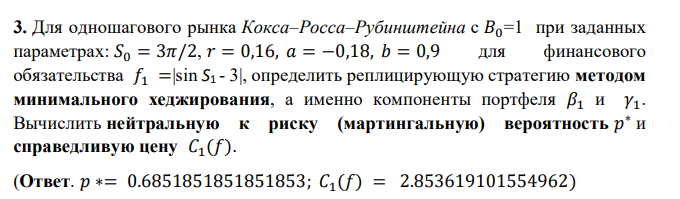

In [ ]:
N = 1
B0 = 1
S0 = 3/2 * np.pi
r = 0.16
a = -0.18
b = 0.9
K = S0

# f1 = |sin(S1)-3|
# найти beta1, gamma1, p_star, C1(f)

In [ ]:
S_up = S0 * (1+b)
S_down = S0 * (1+a)

profit_up = abs(np.sin(S_up) - 3)
profit_down = abs(np.sin(S_down) - 3)

A = np.array([[(1+r), S_up], [(1+r), S_down]])
B = np.array([profit_up, profit_down]).reshape(-1, 1)

componets = np.linalg.inv(A).dot(B).ravel() 
print('компоненты: ', componets)
beta_one = componets[0]
gamma_one = componets[1]
print('beta1 = ', round(beta_one,3), '\ngamma1 = ', round(gamma_one,3))

компоненты:  [ 3.88630648 -0.21914307]
beta1 =  3.886 
gamma1 =  -0.219


In [ ]:
p = (S0 * (1+r) - S_up) / (S_down - S_up)
C = (p * profit_down + (1 - p) * profit_up) / (1+r)
print('мартингальная вероятность = ', round(p,3))
print('справедливая цена = ', round(C, 3))

мартингальная вероятность =  0.685
справедливая цена =  2.854
